<a href="https://colab.research.google.com/github/anushkaa-10/MachineL/blob/main/RandomForestPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('StressLevelDataset.csv')
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1


In [3]:
df.isnull().sum()

,0
anxiety_level,0
self_esteem,0
mental_health_history,0
depression,0
headache,0
blood_pressure,0
sleep_quality,0
breathing_problem,0
noise_level,0
living_conditions,0


In [5]:
df.shape

(1100, 21)

In [6]:
df.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

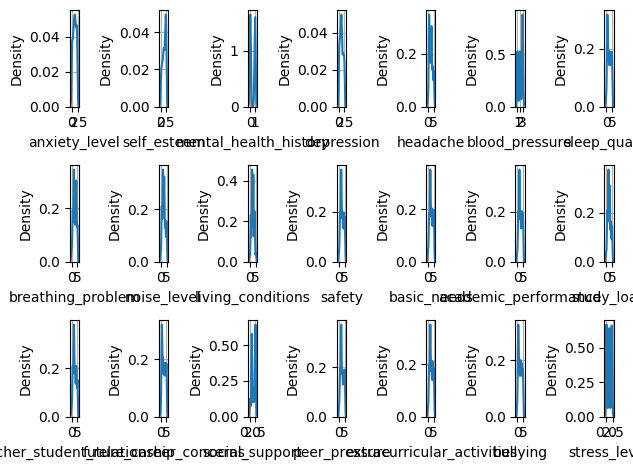

In [12]:
a=1
for i in df.columns:
  plt.subplot(3,7,a)
  sns.kdeplot(df[i])
  plt.grid()
  a+=1
plt.tight_layout()
plt.show()

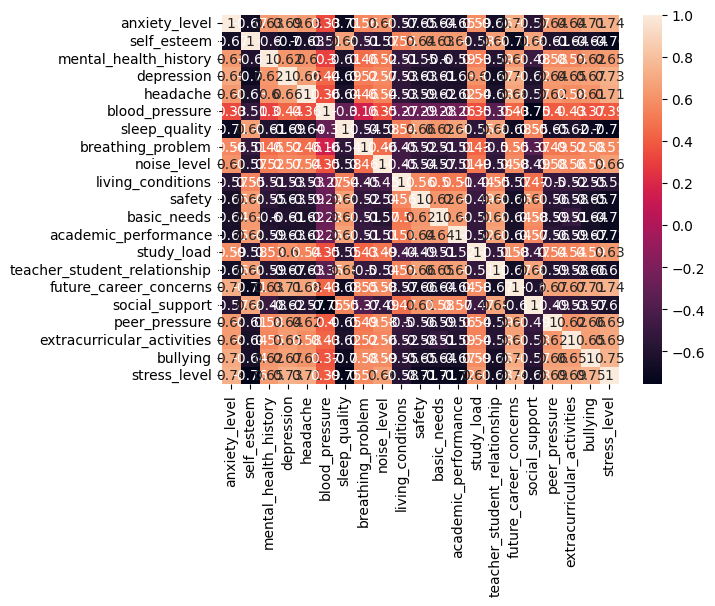

In [13]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [15]:
X = df.drop('stress_level',axis=1)
y = df['stress_level']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred1 = clf.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred1,y_test)
score

0.8954545454545455

In [21]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {
    'n_estimators' : [20,40,60,100,150,200,250,300],
    'max_depth' : [None, 5, 10 ,15],
    'min_samples_split' : [2,5,10,15]
}

In [23]:
gsearch = GridSearchCV(clf,param_grid,cv=5)
gsearch.fit(X_train,y_train)
best_clf = gsearch.best_estimator_

In [26]:
y_pred2 = best_clf.predict(X_test)
score2 = accuracy_score(y_pred2, y_test)
score2

0.8909090909090909

Accuracy is decreased lol